### Notebook Setup

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

#Do this manually for each location:
lat = 8.732

In [2]:
def load_data(file_path):
    df = pd.read_csv(file_path, delimiter=';', header=None)
    df.columns = ['Time', 'Height', 'Column3', 'Column4']
    return df

file_path = 'Kwajalein_data.txt'
df_train = load_data(file_path)
area = file_path.split('_')[0]
df_train.head()

,Time,Height,Column3,Column4
0,1946.4583,6979,7,0
1,1946.5417,6963,0,0
2,1946.6250,6951,0,0
3,1946.7083,6976,0,0
4,1946.7917,6951,0,0


In [3]:
print("Number of training samples: {}".format(len(df_train)))

Number of training samples: 931


#### Load Test Data from File

The test data is stored in file `data/test.csv`. This is a comma-separated file containing 9 columns -- of course, the column `EMISSION` is missing here:

In [4]:
df_test = pd.read_csv("Future.csv")

df_test.head()

,Time
0,2000.0
1,2000.5
2,2001.0
3,2001.5
4,2002.0


In [5]:
print("Number of test samples: {}".format(len(df_test)))

Number of test samples: 201


In [6]:
print("Number of training samples: {}".format(len(df_train)))
df_train_clean = df_train.copy()


columns_to_delete = ['Column3','Column4']
for column in columns_to_delete:
    del df_train_clean[column]
    
df_train_clean.head()

Number of training samples: 931


,Time,Height
0,1946.4583,6979
1,1946.5417,6963
2,1946.6250,6951
3,1946.7083,6976
4,1946.7917,6951


In [7]:
df_train_clean = df_train_clean[df_train_clean.Height > 0]

print('After checking for erroneous values, there are now {} records.'.format(len(df_train_clean)))

After checking for erroneous values, there are now 918 records.


In [8]:
df_train_clean = df_train_clean.dropna()
print('After removing applicable NaN values, there are now {} records.'.format(len(df_train_clean)))

After removing applicable NaN values, there are now 918 records.


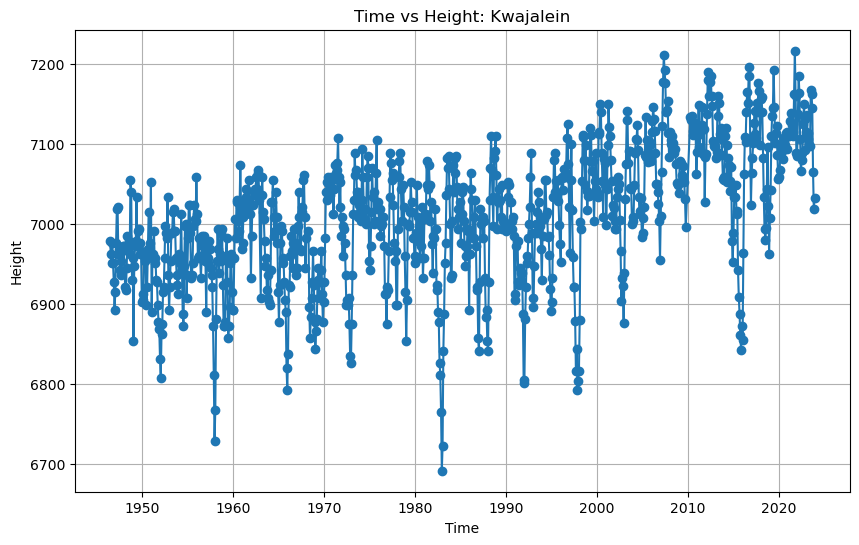

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df_train_clean['Time'], df_train_clean['Height'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title(f'Time vs Height: {area}')
plt.grid(True)
plt.savefig('heightvtime1_{}.png'.format(area.replace(" ", "_")))
plt.show()

In [10]:
x_train = df_train_clean[['Time']]
y_train = df_train_clean['Height']

x_test = df_test[['Time']]

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train_pre, x_test_pre, y_train_pre, y_test_pre = train_test_split(x_train, y_train, test_size=0.2, random_state=50)

In [11]:
from sklearn.linear_model import LinearRegression

linear_model_pre = LinearRegression().fit(x_train_pre, y_train_pre)
train_predictions_pre = linear_model_pre.predict(x_test_pre)
linear_mse_train_pre = mean_squared_error(y_test_pre, train_predictions_pre)
print(f'Linear model MSE (training data): {linear_mse_train_pre:.4f}')
r_squared_linear_pre = r2_score(y_test_pre, train_predictions_pre)
print(f'R-squared value (training data): {r_squared_linear_pre:.4f}')


linear_model = LinearRegression().fit(x_train, y_train)
train_predictions = linear_model.predict(x_train)
linear_mse_train = mean_squared_error(y_train, train_predictions)
print(f'Linear model MSE (all data): {linear_mse_train:.4f}')
r_squared_linear = r2_score(y_train, train_predictions)
print(f'R-squared value (all data): {r_squared_linear:.4f}')

Linear model MSE (training data): 4495.2943
R-squared value (training data): 0.2812
Linear model MSE (all data): 4523.6882
R-squared value (all data): 0.3231


In [12]:
from sklearn.svm import SVR
svr_model_pre = SVR(kernel='rbf').fit(x_train_pre, y_train_pre)
train_predictions_pre = svr_model_pre.predict(x_test_pre)
svr_mse_train_pre = mean_squared_error(y_test_pre, train_predictions_pre)
print(f'SVR model MSE (training data): {svr_mse_train_pre:.4f}')
r_squared_svr_pre = r2_score(y_test_pre, train_predictions_pre)
print(f'R-squared value (training data): {r_squared_svr_pre:.4f}')


svr_model = SVR(kernel='rbf').fit(x_train, y_train)
train_predictions = svr_model.predict(x_train)
svr_mse_train = mean_squared_error(y_train, train_predictions)
print(f'SVR model MSE (all data): {svr_mse_train:.4f}')
r_squared_svr = r2_score(y_train, train_predictions)
print(f'R-squared value (all data): {r_squared_svr:.4f}')

SVR model MSE (training data): 4392.9693
R-squared value (training data): 0.2976
SVR model MSE (all data): 4476.9773
R-squared value (all data): 0.3300


In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train_pre)  
x_train_pre_nn = scaler.transform(x_train_pre)  
x_test_pre_nn = scaler.transform(x_test_pre)

nn_model_pre = MLPRegressor(hidden_layer_sizes=(100,), activation='identity', solver='lbfgs').fit(x_train_pre_nn, y_train_pre)
train_predictions_pre = nn_model_pre.predict(x_test_pre_nn)
nn_mse_train_pre = mean_squared_error(y_test_pre, train_predictions_pre)
print(f'NN model MSE (training data): {nn_mse_train_pre:.4f}')
r_squared_nn_pre = r2_score(y_test_pre, train_predictions_pre)
print(f'R-squared value (training data): {r_squared_nn_pre:.4f}')

scaler.fit(x_train)  
x_train_nn = scaler.transform(x_train)  
x_test_nn = scaler.transform(x_test)
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='identity', solver='lbfgs').fit(x_train_nn, y_train)
train_predictions = nn_model.predict(x_train_nn)
nn_mse_train = mean_squared_error(y_train, train_predictions)
print(f'NN model MSE (all data): {nn_mse_train:.4f}')
r_squared_nn = r2_score(y_train, train_predictions)
print(f'R-squared value (training data): {r_squared_nn:.4f}')

NN model MSE (training data): 4495.2948
R-squared value (training data): 0.2812
NN model MSE (all data): 4523.6882
R-squared value (training data): 0.3231


In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
x_train_poly_pre = poly_features.fit_transform(x_train_pre)
x_test_poly_pre = poly_features.transform(x_test_pre)

poly_model_pre = LinearRegression().fit(x_train_poly_pre, y_train_pre)
train_predictions_pre = poly_model_pre.predict(x_test_poly_pre)
poly_mse_train_pre = mean_squared_error(y_test_pre, train_predictions_pre)
print(f'Polynomial model MSE (training data): {poly_mse_train_pre:.4f}')
r_squared_poly_pre = r2_score(y_test_pre, train_predictions_pre)
print(f'R-squared value (training data): {r_squared_poly_pre:.4f}')

x_train_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression().fit(x_train_poly, y_train)
train_predictions = poly_model.predict(x_train_poly)
poly_mse_train = mean_squared_error(y_train, train_predictions)
print(f'Polynomial model MSE (all data): {poly_mse_train:.4f}')
r_squared_poly = r2_score(y_train, train_predictions)
print(f'R-squared value (all data): {r_squared_poly:.4f}')

Polynomial model MSE (training data): 4382.3760
R-squared value (training data): 0.2993
Polynomial model MSE (all data): 4352.1102
R-squared value (all data): 0.3487


In [15]:
mses = {
    'Polynomial Regression (2nd order)': (poly_mse_train,r_squared_poly),
    'Linear Regression': (linear_mse_train,r_squared_linear),
    'Support Vector Regression': (svr_mse_train,r_squared_svr),
    'Neural Network Regression': (nn_mse_train,r_squared_nn),

}
print('Model Performance:')
sorted_mses = sorted(mses.items(), key=lambda x: x[1][0])
for name, value in sorted_mses:
    print(f'{name}: ')
    print(f'MSE = {value[0]:.4f}')
    print(f'R^2 = {value[1]:.4f}')
    print('\n')

Model Performance:
Polynomial Regression (2nd order): 
MSE = 4352.1102
R^2 = 0.3487


Support Vector Regression: 
MSE = 4476.9773
R^2 = 0.3300


Linear Regression: 
MSE = 4523.6882
R^2 = 0.3231


Neural Network Regression: 
MSE = 4523.6882
R^2 = 0.3231




In [16]:
linear_predicted_heights = linear_model.predict(x_test)
svr_predicted_heights = svr_model.predict(x_test)
nn_predicted_heights = nn_model.predict(x_test_nn)
x_test_poly = poly_features.fit_transform(x_test)
poly_predicted_heights = poly_model.predict(x_test_poly)


df_test['linear_predicted_heights'] = linear_predicted_heights
df_test['poly_predicted_heights'] = poly_predicted_heights
df_test['svr_predicted_heights'] = svr_predicted_heights
df_test['nn_predicted_heights'] = nn_predicted_heights

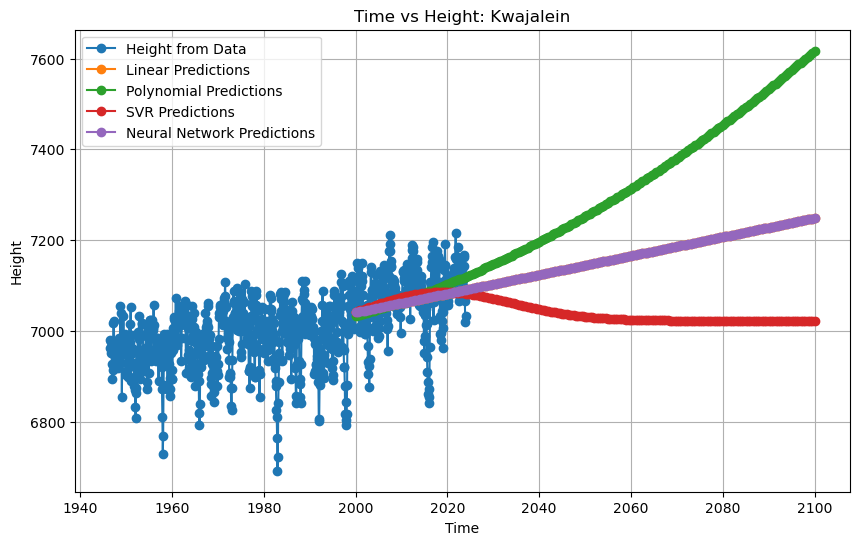

In [17]:
min_time = min(df_train_clean['Time'].min(), df_test['Time'].min())
max_time = max(df_train_clean['Time'].max(), df_test['Time'].max())
new_times = np.linspace(min_time, max_time, num=100)
plt.figure(figsize=(10, 6))
plt.plot(df_train_clean['Time'], df_train_clean['Height'], label='Height from Data', marker='o', linestyle='-')
plt.plot(df_test['Time'], df_test['linear_predicted_heights'], label='Linear Predictions', marker='o', linestyle='-')
plt.plot(df_test['Time'], df_test['poly_predicted_heights'], label='Polynomial Predictions', marker='o', linestyle='-')
plt.plot(df_test['Time'], df_test['svr_predicted_heights'], label='SVR Predictions', marker='o', linestyle='-')
plt.plot(df_test['Time'], df_test['nn_predicted_heights'], label='Neural Network Predictions', marker='o', linestyle='-')


plt.xlabel('Time')
plt.ylabel('Height')
plt.title(f'Time vs Height: {area}')
#plt.ylim(ymin=6600, ymax=7800) 
#plt.xlim(xmin=1940, xmax=1950) 
plt.legend()
plt.grid(True)
plt.savefig('heightvtime2_{}.png'.format(area.replace(" ", "_")))

plt.show()


In [18]:
start_times = df_train_clean['Time'].nsmallest(5)
average_height_earliest_times = df_train_clean[df_train_clean['Time'].isin(start_times)]['Height'].mean()

third_time_value = df_train_clean['Time'].nsmallest(3).iloc[-1]
third_time_value = round(third_time_value)

third_latest_time_value = df_train_clean['Time'].nlargest(3).iloc[-1]
third_latest_time_value = round(third_latest_time_value)

latest_times = df_train_clean['Time'].nlargest(5)
average_height_latest_times = df_train_clean[df_train_clean['Time'].isin(latest_times)]['Height'].mean()


latest_time_index = df_test['Time'].idxmax()
latest_time_height_linear = df_test.loc[latest_time_index, 'linear_predicted_heights']
latest_time_height_nn = df_test.loc[latest_time_index, 'nn_predicted_heights']
latest_time_height_svr = df_test.loc[latest_time_index, 'svr_predicted_heights']
latest_time_height_poly = df_test.loc[latest_time_index, 'poly_predicted_heights']


existing_time = third_latest_time_value - third_time_value
existing_change_m = (average_height_latest_times - average_height_earliest_times)/1000

new_time = 2100 - third_latest_time_value
max_change = (max(latest_time_height_linear,latest_time_height_nn,latest_time_height_svr,latest_time_height_poly) - average_height_latest_times)/1000
min_change = (min(latest_time_height_linear,latest_time_height_nn,latest_time_height_svr,latest_time_height_poly) - average_height_latest_times)/1000
linear_change = (latest_time_height_linear - average_height_latest_times)/1000

max_loss = max_change *57.3
min_loss = min_change *57.3
linear_loss = linear_change *57.3

In [19]:
print(f'Area: {area}')
print(f'Existing Data: {existing_time} years from {third_time_value} to {third_latest_time_value}')
if existing_change_m > 0:
    print(f'Existing sea level rise: {existing_change_m:.4f} meters')
if existing_change_m < 0:
    print(f'Existing sea level fall: {existing_change_m:.4f} meters')
print('\n')
print(f'Years until 2100 (from existing data): {new_time}')
print(f'Sea level change: {min_change:.4f} to {max_change:.4f} meters')
print('\n')
print(f'Most likely change: {linear_change:.4f} meters')
print('\n')

print(f'Horizontal land change: {min_loss:.4f} to {max_loss:.4f} meters')
if linear_loss > 0:
    print(f'Most likely horizontal land loss: {linear_loss:.4f}')
if linear_loss < 0:
    print(f'Most likely horiontal land gain: {linear_loss*(-1):.4f}')

Area: Kwajalein
Existing Data: 77 years from 1947 to 2024
Existing sea level rise: 0.1204 meters


Years until 2100 (from existing data): 76
Sea level change: -0.0620 to 0.5329 meters


Most likely change: 0.1642 meters


Horizontal land change: -3.5526 to 30.5349 meters
Most likely horizontal land loss: 9.4081


In [20]:
import csv
import os

data_dict = {'area':area,
            'latitude':lat,
            'linear_train_mse':linear_mse_train_pre,
            'linear_train_r2':r_squared_linear_pre,
            'linear_mse':linear_mse_train,
            'linear_r2':r_squared_linear,
            'svr_train_mse':svr_mse_train_pre,
            'svr_train_r2':r_squared_svr_pre,
            'svr_mse':svr_mse_train,
            'svr_r2':r_squared_svr,
            'nn_train_mse':nn_mse_train_pre,
            'nn_train_r2':r_squared_nn_pre,
            'nn_mse':nn_mse_train,
            'nn_r2':r_squared_nn,
            'poly_train_mse':poly_mse_train_pre,
            'poly_train_r2':r_squared_poly_pre,
            'poly_mse':poly_mse_train,
            'poly_r2':r_squared_poly,
            'existing_time':existing_time,
            'existing_change_m':existing_change_m,
            'time_to_2100':new_time,
            'max_change_vert':max_change,
            'min_change_vert':min_change,
            'linear_change': linear_change,
            'max_change_horz':max_loss,
            'min_change_horz':min_loss,
            'linear_change_horz':linear_loss,
            }

def write_file(area, data_dict):
    filename = "Total_data.csv"
    file_exists = os.path.exists(filename)

    with open(filename, 'a', newline='') as csvfile:
        fieldnames = ['area', 'latitude','linear_train_mse', 'linear_train_r2', 'linear_mse','linear_r2' , 
                      'svr_train_mse' , 'svr_train_r2', 'svr_mse' , 'svr_r2' ,
                      'nn_train_mse','nn_train_r2' ,'nn_mse' ,'nn_r2' , 
                      'poly_train_mse','poly_train_r2','poly_mse','poly_r2',
                      'existing_time','existing_change_m','time_to_2100','max_change_vert','min_change_vert','linear_change',
                      'max_change_horz','min_change_horz','linear_change_horz']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        if not file_exists:
            writer.writeheader()

        with open(filename, 'r', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            rows = list(reader)
            for row in rows:
                if row['area'] == area:
                    rows.remove(row)

        writer.writerow(data_dict)



write_file(area, data_dict)
